Part A

In [68]:
import matplotlib.pyplot as plt

In [5]:
with open("input15.txt","r") as f:
    lines=f.readlines()
    
lines=[line.strip("\n") for line in lines]
lines[:3]

['1964778752979887222739789777935919929996793679617497991954953881381939846468999159686925929898196249',
 '8759189989991999115121999113211788158983883981916933973182798769168715496674423979199573198873854989',
 '2916817799179797949192724497956464139512861918986689421481689714471669982489852996119597949888649993']

In [20]:
import numpy as np

lines_arr=[]
for line in lines:
    lines_arr.append([int(char) for char in line])
    
arr=np.array(lines_arr)
arr.shape

(100, 100)

In [21]:
arr

array([[1, 9, 6, ..., 2, 4, 9],
       [8, 7, 5, ..., 9, 8, 9],
       [2, 9, 1, ..., 9, 9, 3],
       ...,
       [1, 1, 3, ..., 8, 8, 2],
       [7, 2, 9, ..., 8, 4, 9],
       [9, 1, 7, ..., 1, 1, 9]])

In [24]:
costs_orig=np.inf*np.ones_like(arr)
costs_orig[0,0]=0 # starting pos

is_visited_orig=np.zeros_like(arr,dtype=np.bool)

In [79]:
def position_is_valid(shape,r,c):
    rmax,cmax=shape
    return r>=0 and c>=0 and r<rmax and c<cmax

In [80]:
def one_iteration(current_position, arr, costs, is_visited):
    rcur,ccur=current_position
    neighbors=[[rcur-1,ccur],[rcur+1,ccur],[rcur,ccur-1],[rcur, ccur+1]]

    # compute costs to reach all neighbors
    for r,c in neighbors:
        if not position_is_valid(arr.shape,r,c):
            continue
        new_cost=costs[rcur,ccur]+arr[r,c]
        if new_cost<costs[r,c]:
            costs[r,c]=new_cost

    is_visited[rcur,ccur]=True
    
    return costs, is_visited

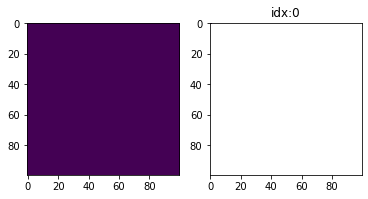

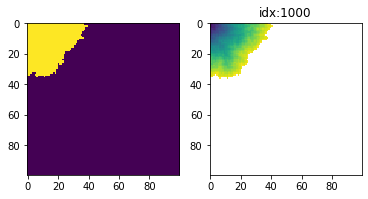

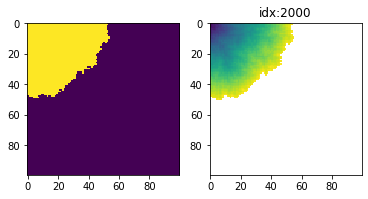

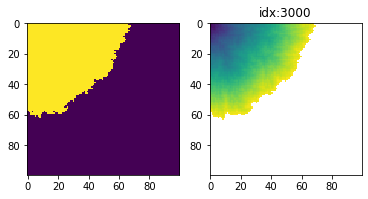

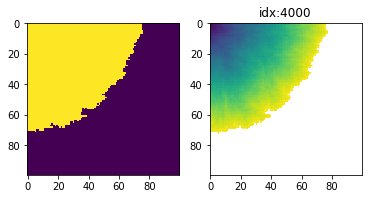

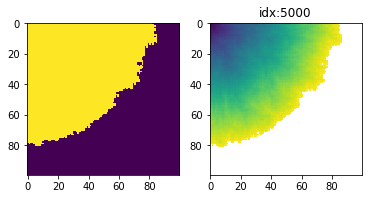

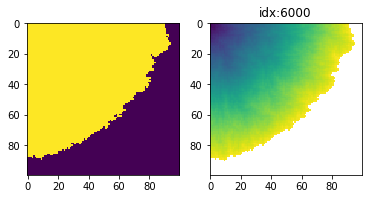

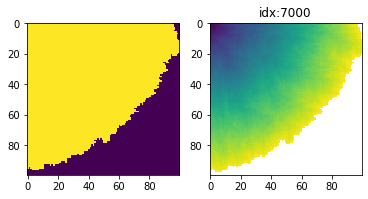

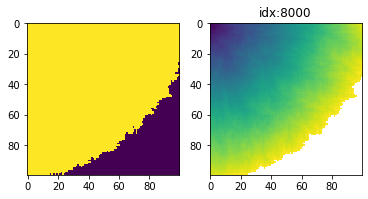

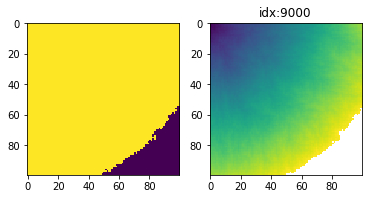

In [86]:
costs=costs_orig.copy()
is_visited=is_visited_orig.copy()

next_position=[0,0] # row,col

for idx in range(arr.shape[0]*arr.shape[1]):
    if idx%1000==0:
        plt.subplot(121)
        plt.imshow(is_visited)
        plt.subplot(122)
        plt.imshow(costs)
        plt.title("idx:"+str(idx))
        plt.show()

    costs,is_visited=one_iteration(next_position,arr,costs,is_visited)
    
    if np.all(is_visited):
        break
        
    # find the next position: unvivisted and with the lowest cost
    search_mat=costs.copy()
    search_mat[is_visited]=np.inf
    arg=np.argmin(search_mat)
    arg_row,arg_col=np.unravel_index(arg,arr.shape)
    next_position=[arg_row, arg_col]
    


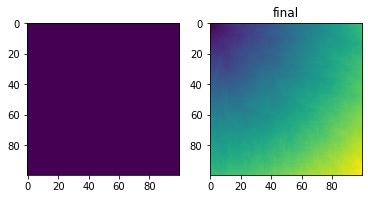

In [87]:
plt.subplot(121)
plt.imshow(is_visited)
plt.subplot(122)
plt.imshow(costs)
plt.title("final")
plt.show()


In [89]:
costs[-1,-1]

720.0

Part B

In [90]:
from itertools import product

In [99]:
# create new cave map
nrows,ncols=arr.shape

arr_large=np.zeros((nrows*5,ncols*5),dtype=np.int)
for ridx,cidx in product(range(5),range(5)):
    arr_large[ridx*nrows:(ridx+1)*nrows,cidx*ncols:(cidx+1)*ncols]=arr+ridx+cidx
    
# substract multiple of 9
base_level=((arr_large-1)/9).astype(np.int)*9
base_level

arr_large=arr_large-base_level

In [102]:
costs_large_orig=np.inf*np.ones_like(arr_large)
costs_large_orig[0,0]=0 # starting pos

is_visited_large_orig=np.zeros_like(arr_large,dtype=np.bool)

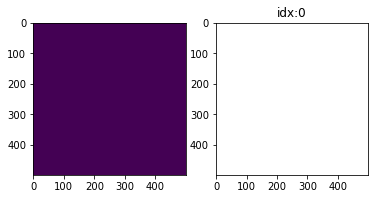

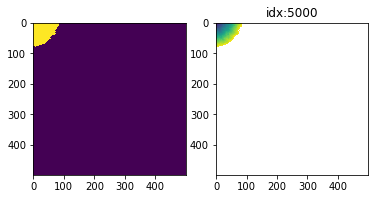

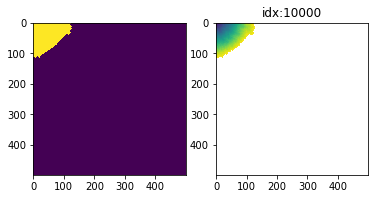

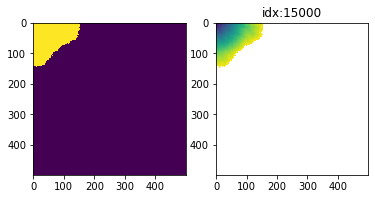

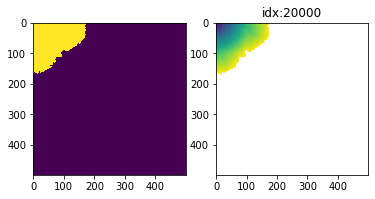

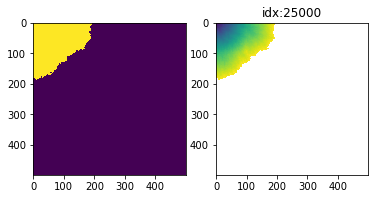

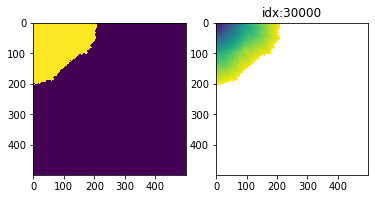

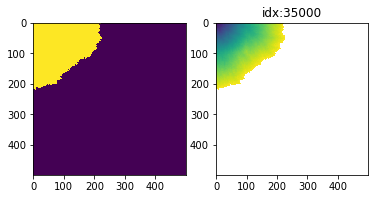

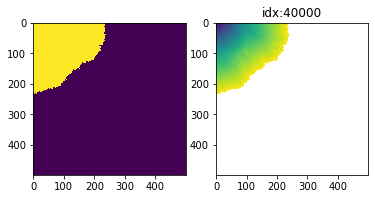

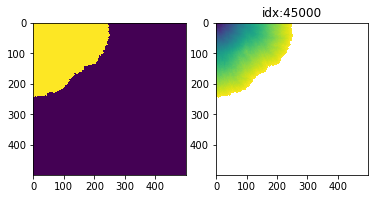

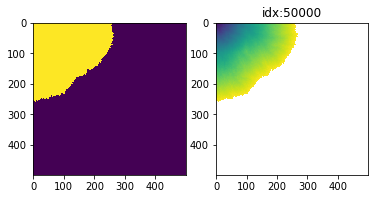

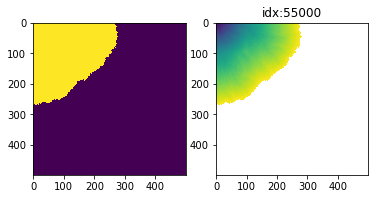

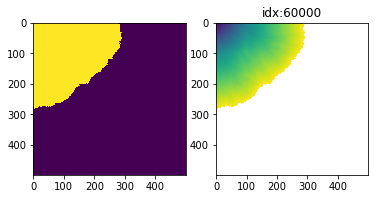

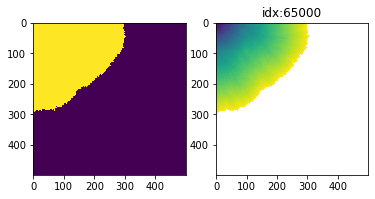

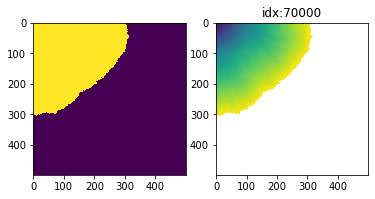

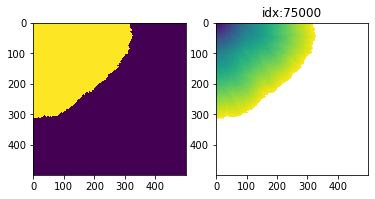

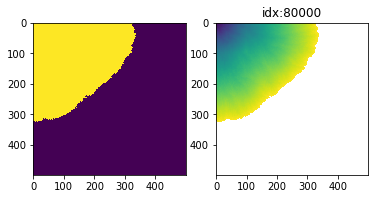

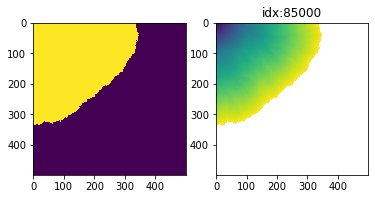

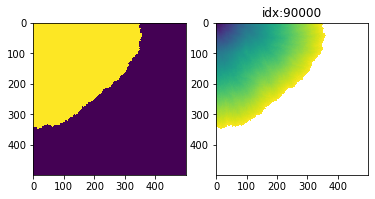

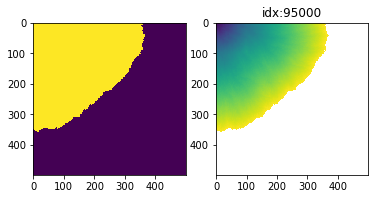

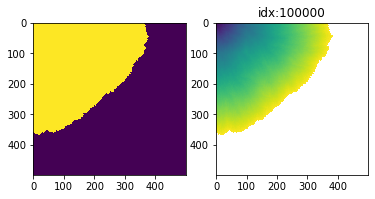

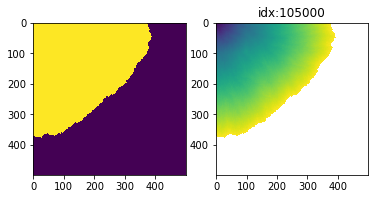

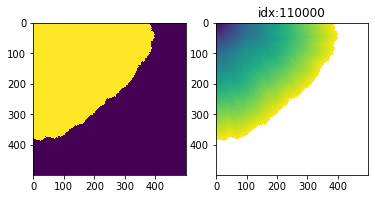

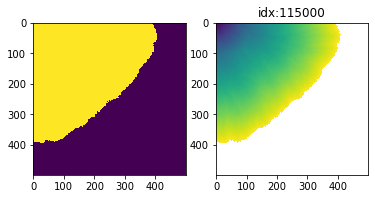

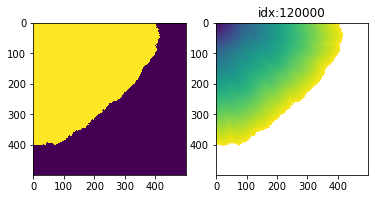

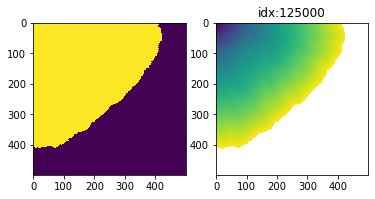

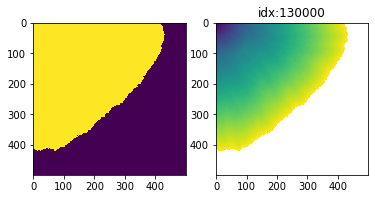

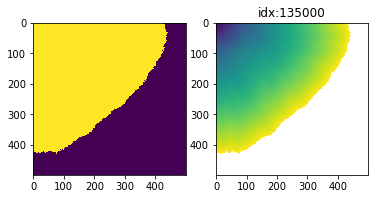

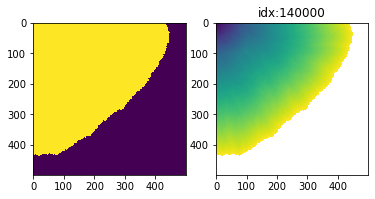

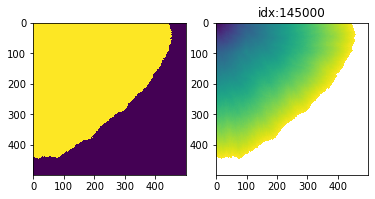

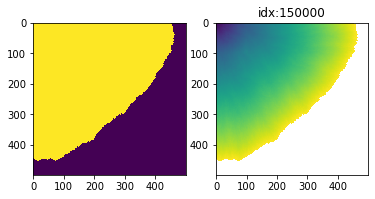

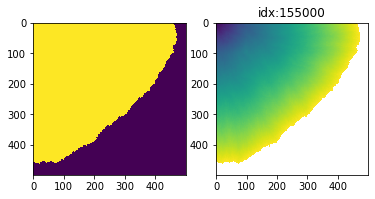

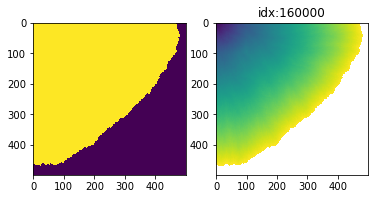

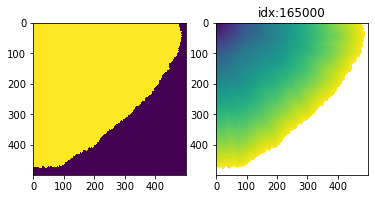

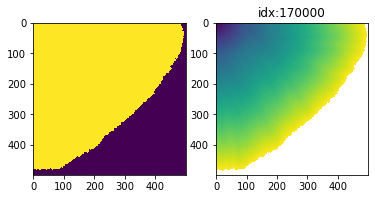

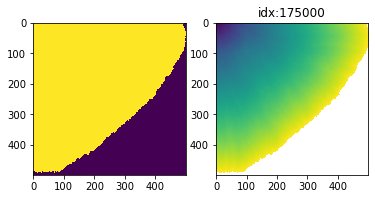

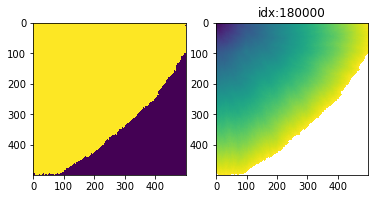

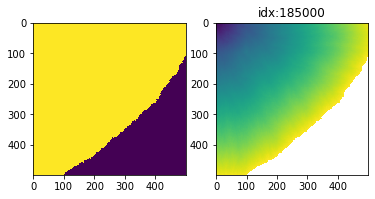

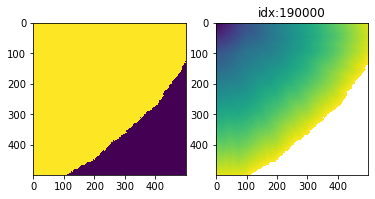

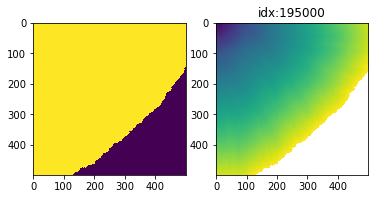

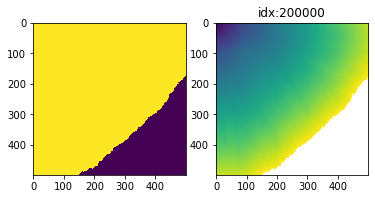

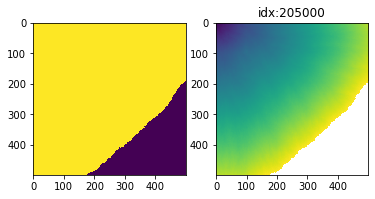

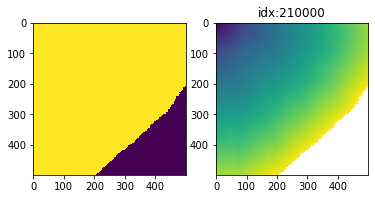

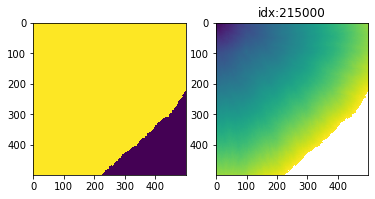

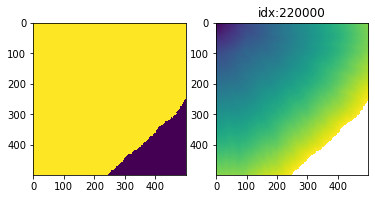

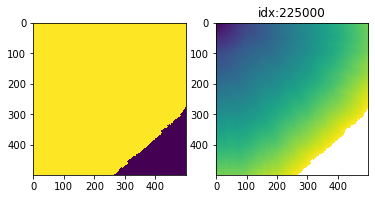

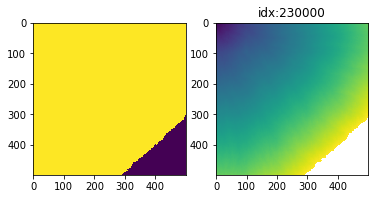

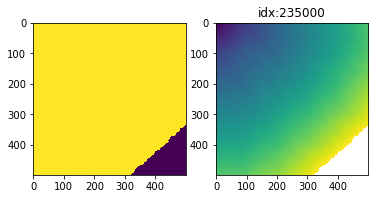

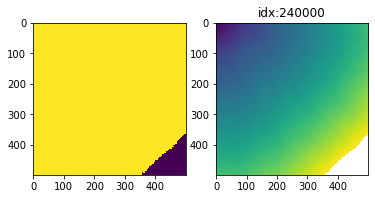

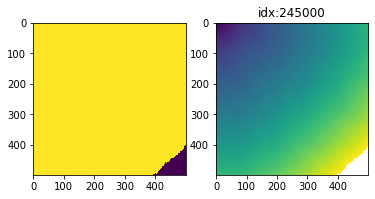

In [105]:
# dijsktra!

costs=costs_large_orig.copy()
is_visited=is_visited_large_orig.copy()

next_position=[0,0] # row,col

for idx in range(arr_large.shape[0]*arr_large.shape[1]):
    if idx%5000==0:
        plt.subplot(121)
        plt.imshow(is_visited)
        plt.subplot(122)
        plt.imshow(costs)
        plt.title("idx:"+str(idx))
        plt.show()

    costs,is_visited=one_iteration(next_position,arr_large,costs,is_visited)
    
    if np.all(is_visited):
        break
        
    # find the next position: unvivisted and with the lowest cost
    search_mat=costs.copy()
    search_mat[is_visited]=np.inf
    arg=np.argmin(search_mat)
    arg_row,arg_col=np.unravel_index(arg,arr_large.shape)
    next_position=[arg_row, arg_col]
    


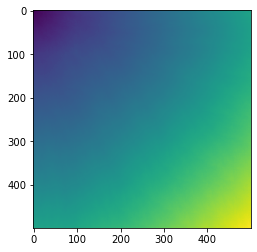

In [106]:
plt.imshow(costs)

In [107]:
costs[-1,-1]

3025.0